In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import project_functions as pf

In [2]:
df = pf.load_and_process('../../data/raw/games-features.csv')

# Dataset Explaination

Our dataset features data from the Steam games store. It showcases the games that are purchasable from the store and displays their release date, rating, number of recommendations, owners, genre, pricing, and total revenue. The rating and recommendations obtained via the steam user base in which they provide their feedback on the games they have purchased from the store. 

# Task 5

## Research Questions
After looking through and exploring our data, these are the research questions we thought would be interesting to analyse:
1. What game genres are the most popular (they have the most owners)?
2. What game genres make the most money?
3. Does the amount of games in a genre correlate to the genres popularity?
4. Is there a correlation between owners and rating?
5. How do game ratings compare across genres?

### Plots 
    The plots are a definite work in progress as of now as I am still working on a method to apply to the data to obtain better plots.
    The code simply takes one of the functions given in project_functions to clean the data than applying plots to the genres and the price to get information on the ownership of the   games.

Total Owners :  2217998757  Indie :  731152113  Action  :  1512554753  Casual  :  240120444  Adventure  :  550881684  Strategy:  477453337 RPG  :  459321917  Simulation  :  273863846  Early Access :  162389801  Free To Play :  574553200  Sports :  59135546  Racing :  50611953  Massively Multiplayer :   229371663


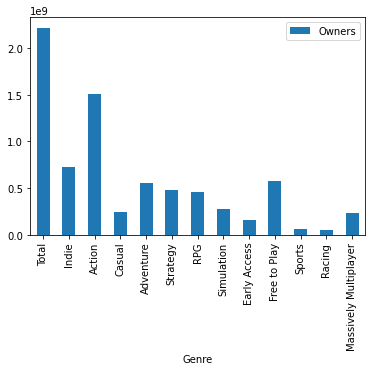

In [3]:
#This plot addresses the question of what genre has the most owners
pf.plotOwners(df)

### 

Total Games :  13038  Indie Games :  7780  Action Games :  5633  Casual Games :  3564  Adventure Games :  4319  Strategy Games:  2623 RPG  :  2087  Simulation Games :  2102  Early Access :  1438  Free To Play :  665  Sports :  541  Racing :  476  Massively Multiplayer :   389


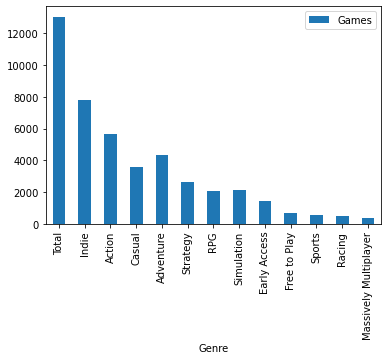

In [4]:
#This plot analyses the total amount of games categorized in each genre
pf.Genrecount(df)

Total  :  25094.869310830007  Indie  :  6353.22448572  Action  :  16578.13137856  Casual  :  1090.51912292  Adventure :  6796.093231229999  Strategy :  5110.410997350001 RPG  :  5068.28928216  Simulation  :  3228.5843055900004  Early Access :  1089.50451871  Free To Play :  1.2510462500000001  Sports :  736.49216724  Racing :  771.73085653  Massively Multiplayer :   630.50235201


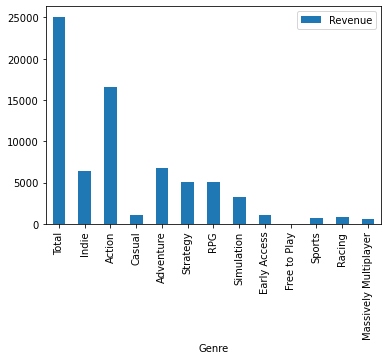

In [5]:
#This plot compares the total theoretical revenue in millions of different genres
#Theoretical revenue was calculated by multiplying owners and price, it does not take into account times the game went on sale
pf.plotRevenue(df)

<seaborn.axisgrid.FacetGrid object at 0x000001F2950DC6D0> <seaborn.axisgrid.FacetGrid object at 0x000001F297FE3E50> <seaborn.axisgrid.FacetGrid object at 0x000001F297F10C70> <seaborn.axisgrid.FacetGrid object at 0x000001F2934DB0D0> <seaborn.axisgrid.FacetGrid object at 0x000001F297FE3B50> <seaborn.axisgrid.FacetGrid object at 0x000001F292F0DAC0> <seaborn.axisgrid.FacetGrid object at 0x000001F2936A52B0>


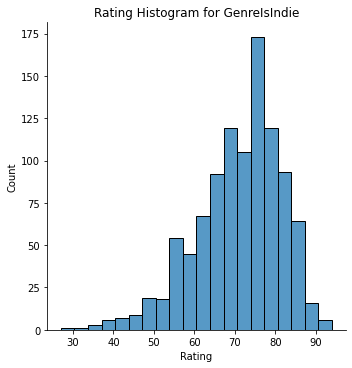

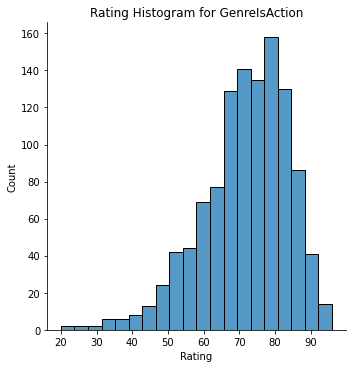

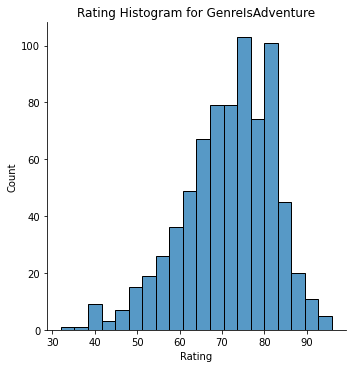

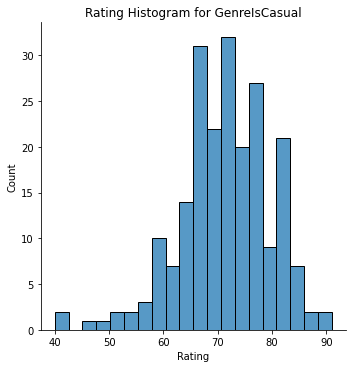

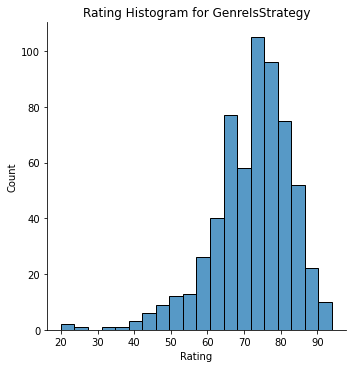

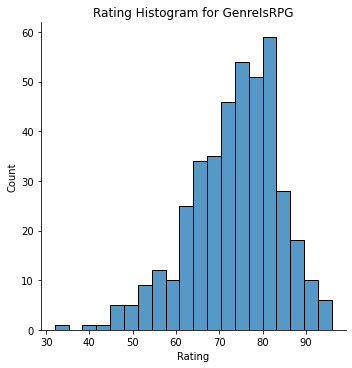

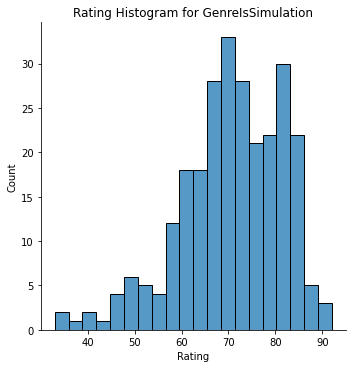

In [9]:
#These histograms show the average ratings for games within genres, allowing us to compare them visually
indie = pf.genreratingplot(df,"GenreIsIndie")
action = pf.genreratingplot(df,"GenreIsAction")
adventure = pf.genreratingplot(df,"GenreIsAdventure")
casual = pf.genreratingplot(df,"GenreIsCasual")
strategy = pf.genreratingplot(df,"GenreIsStrategy")
rpg = pf.genreratingplot(df,"GenreIsRPG")
simulation = pf.genreratingplot(df,"GenreIsSimulation")
print(indie,action,adventure,casual,strategy,rpg,simulation)

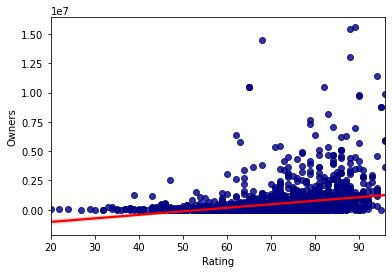

In [12]:
#Removing games without a rating
dfrated = df[df.Rating != 0]
#This plot removes outliers, compares ratings to owners and applies a trend line
ratingvowners = sns.regplot(data=dfrated[dfrated["Owners"]<20000000],x="Rating",y="Owners", scatter_kws={"color": "navy"}, line_kws={"color": "red"})

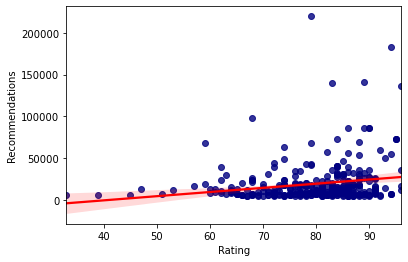

In [13]:
#This plot removes outliers and games with less than 5000 recommendations, compares user recommendations to critic ratings, and applies a trend line
ratingvrecommend = sns.regplot(data=dfrated[(dfrated["Recommendations"]<300000)&(dfrated["Recommendations"]>5000)],x="Rating",y="Recommendations", scatter_kws={"color": "navy"}, line_kws={"color": "red"})

## Research Questions conclusions so far
After looking through and exploring our data, these are the research questions we thought would be interesting to analyse:
1. What game genres are the most popular (they have the most owners)?
    * The most popular genre in terms of owners is by far action, which makes sense as genres overlap and many games are classified as action as well as other genres.
    * Following action the most popular genres are 
2. What game genres make the most money?
    * The game genres with the highest theoretical revenues were Action, Adventure and Indie.
    * It is suprising how little revenue Casual games make compared to how many of them are on the store.
3. Does the amount of games in a genre correlate to the genres popularity?
    * Some genres correlate higher than others, but genres like Indie are overrepresented in total amount of games, this is likely due to the fact that the most popularly owned games are big AAA titles, whereas the highest volume of games comes from smaller and lesser known indie companies.
4. Is there a correlation between owners and rating?
    * Based on the trend line for the scatterplot, there does seem to be a slight correlation indicating that the higher a game's rating is, the more owners it might have. 
5. How do game ratings compare across genres?
    * Out of the most popular genres, it seems like the ones with the lowest average ratings are Casual and Simulation